In [2]:
from importlib import reload

import myutman
reload(myutman.stand_utils)
reload(myutman.stand)
reload(myutman.window_algo)
reload(myutman.generation)
reload(myutman.fuse)

from myutman.fuse import FuseForWindowAlgo
from myutman.generation import  ChangeSampleGeneration, StillSampleGeneration
from myutman.node_distribution import RoundrobinNodeDistribution, DependentNodeDistribution, \
    SecondMetaDependentNodeDistribution
from myutman.stand import Stand
from myutman.stand_utils import compare_vals, show_boxplots
from myutman.window_algo import WindowStreamingAlgo

AttributeError: module 'myutman' has no attribute 'stand_utils'

In [ ]:
n_nodes = 10
stand_roundrobins = Stand(
    n_nodes=n_nodes,
    algo=WindowStreamingAlgo,
    client_node_distribution=RoundrobinNodeDistribution,
    terminal_node_distribution=RoundrobinNodeDistribution,
    fuse=FuseForWindowAlgo()
)
stand_client_dependent = Stand(
    n_nodes=n_nodes,
    algo=WindowStreamingAlgo,
    client_node_distribution=DependentNodeDistribution,
    terminal_node_distribution=SecondMetaDependentNodeDistribution,
    fuse=FuseForWindowAlgo()
)
stand_terminal_dependent = Stand(
    n_nodes=n_nodes,
    algo=WindowStreamingAlgo,
    client_node_distribution=SecondMetaDependentNodeDistribution,
    terminal_node_distribution=DependentNodeDistribution,
    fuse=FuseForWindowAlgo()
)
stand_resharding = Stand(
    n_nodes=n_nodes,
    algo=WindowStreamingAlgo,
    client_node_distribution=DependentNodeDistribution,
    terminal_node_distribution=DependentNodeDistribution,
    fuse=FuseForWindowAlgo()
)

In [ ]:
stands = [
    stand_roundrobins,
    stand_client_dependent,
    stand_terminal_dependent,
    stand_resharding
]

generations = [
    ChangeSampleGeneration
]

results = [[[] for _ in stands] for _ in generations]
for state in range(10):
    for i, generation in enumerate(generations):
        sample, change_points = generation(state=state)()
        for j, stand in enumerate(stands):
            result1 = stand.test(
                p=0.05,
                sample=sample,
                change_points=change_points,
                n_clients=20,
                n_terminals=20
            )
            print(result1)
            results[i][j].append(result1)

In [ ]:
results[0].append([])

In [ ]:
stand_centralized = Stand(
    n_nodes=1,
    algo=WindowStreamingAlgo,
    client_node_distribution=RoundrobinNodeDistribution,
    terminal_node_distribution=RoundrobinNodeDistribution,
    fuse=FuseForWindowAlgo()
)

In [ ]:
for state in range(10):
    sample, change_points = generation(state=state)()
    result1 = stand_centralized.test(
        p=0.05,
        sample=sample,
        change_points=change_points,
        n_clients=20,
        n_terminals=20
    )
    print(result1)
    results[0][4].append(result1)

In [ ]:
still_results = [[[] for _ in stands]] 
for state in range(1):
    for i, generation in enumerate([StillSampleGeneration(state=state)]):
        sample, change_points = generation(state=state)()
        for j, stand in enumerate(stands):
            result1 = stand.test(
                p=0.05,
                sample=sample,
                change_points=change_points,
                n_clients=20,
                n_terminals=20
            )
            print(result1)
            still_results[i][j].append(result1)

In [ ]:
import json

with open('results.json', 'w') as results_file:
    json.dump(results, results_file, indent=4, ensure_ascii=False)

In [ ]:
with open('centralized_vs_roundrobin_p=[0.01, 0.05, 0.1]_nnodes=[4, 8, 16]_original_experiment1_algo_20k_iter_no_change_period_noise.json') as input_file:
    results = json.load(input_file)

In [ ]:
len(results[0][0])

In [ ]:
show_boxplots('client_MDR', results[0], ['stand_centralized', 'stand_roundrobin', 'stand_client_dependent', 'stand_terminal_dependent'])

In [ ]:
show_boxplots('terminal_MDR', results[0], ['stand_centralized', 'stand_roundrobin', 'stand_client_dependent', 'stand_terminal_dependent'])

In [ ]:
show_boxplots('client_latency', results[0], ['stand_centralized', 'stand_roundrobin', 'stand_client_dependent', 'stand_terminal_dependent'])

In [ ]:
show_boxplots('terminal_latency', results[0], ['stand_centralized', 'stand_roundrobin', 'stand_client_dependent', 'stand_terminal_dependent'])

In [ ]:
show_boxplots('client_FDR', results[0], ['stand_centralized', 'stand_roundrobin', 'stand_client_dependent', 'stand_terminal_dependent'])

In [ ]:
show_boxplots('terminal_FDR', results[0], ['stand_centralized', 'stand_roundrobin', 'stand_client_dependent', 'stand_terminal_dependent'])

## Roundrobin vs Client dependency

In [ ]:
compare_vals('client_FDR', results[0][0], results[0][1], 'stand_centralized', 'stand_roundrobins')

In [ ]:
compare_vals('terminal_FDR', results[0][0], results[0][1], 'stand_centralized', 'stand_roundrobins')

In [ ]:
compare_latencies(results[0][0], results[0][1], 'stand_roundrobins', 'stand_client_dependent')

## Roundrobin vs Terminal dependency

In [ ]:
compare_mdrs(results[0][0], results[0][2], 'stand_roundrobins', 'stand_terminal_dependent')

In [ ]:
compare_fdrs(results[0][0], results[0][2], 'stand_roundrobins', 'stand_terminal_dependent')

In [ ]:
compare_latencies(results[0][0], results[0][2], 'stand_roundrobins', 'stand_terminal_dependent')

## Client dependency vs Resharding

In [ ]:
compare_mdrs(results[0][1], results[0][3], 'stand_client_dependent', 'stand_resharding')

In [ ]:
compare_fdrs(results[0][1], results[0][3], 'stand_client_dependent', 'stand_resharding')

In [ ]:
compare_latencies(results[0][1], results[0][3], 'stand_client_dependent', 'stand_resharding')

## Terminal dependency vs Resharding

In [ ]:
compare_mdrs(results[0][2], results[0][3], 'stand_terminal_dependent', 'stand_resharding')

In [ ]:
compare_fdrs(results[0][2], results[0][3], 'stand_terminal_dependent', 'stand_resharding')

In [ ]:
compare_latencies(results[0][2], results[0][3], 'stand_terminal_dependent', 'stand_resharding')

In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [7]:
points = [
    *np.random.normal(0, 1, size=1000),
    *np.random.normal(2, 1, size=1000),
]

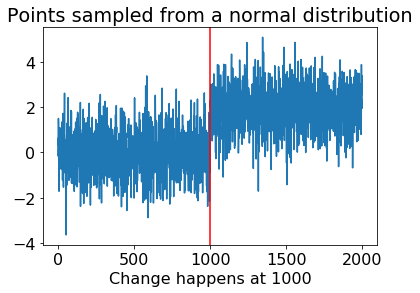

In [25]:
plt.rcParams.update({'font.size': 16})
plt.title('Points sampled from a normal distribution')
plt.xlabel('Change happens at 1000')
plt.plot(points)
plt.axvline(1000, color='red')
plt.show()